In [ ]:
# Install necessary packages
!pip install fosforml
!pip install statsmodels
!pip install pmdarima

In [1]:
# Import necessary libraries
from fosforml.model_manager.snowflakesession import get_session
import pandas as pd
import matplotlib.pyplot as plt

# Establish session and load data
my_session = get_session()
file_name = 'EMPLOYEE_ATTRITION_MASTERTABLE'
sf_df = my_session.sql("select * from {}".format(file_name))
pandas_df = sf_df.to_pandas()

In [2]:
# Check for NULL VALUES and drop missing values
print(pandas_df.isnull().sum())

ROLE                                  0
LINE_OF_BUSINESS                      0
DELIVERY_UNIT                         0
PRACTICE_UNIT                         0
EMPLOYMENT_TYPE                       0
OVERTIME_HOURS                        0
AVERAGE_PERCENTAGE_SALARY_HIKE        0
AVERAGE_PERFORMANCE_RATING            0
JOB_STARTDATE                         0
JOB_ENDDATE                       74811
CHURN                                 0
TENURE_MONTHS                         0
DISTANCE                              0
TURNOVER_REASONS                      0
SHIFT                                 0
JOB_SATISFACTION                      0
EMPLOYEE_ID                           0
SALARY_INR                            0
SALARY_RANGE                          0
SALARY_LEVEL                          0
OVER_TIME                             0
BIRTH_YEAR                            0
AGE                                   0
QUALIFICATION                         0
ETHNICITY                             0


In [3]:
pandas_df = pandas_df.dropna()

In [4]:
print(pandas_df.isnull().sum())

ROLE                              0
LINE_OF_BUSINESS                  0
DELIVERY_UNIT                     0
PRACTICE_UNIT                     0
EMPLOYMENT_TYPE                   0
OVERTIME_HOURS                    0
AVERAGE_PERCENTAGE_SALARY_HIKE    0
AVERAGE_PERFORMANCE_RATING        0
JOB_STARTDATE                     0
JOB_ENDDATE                       0
CHURN                             0
TENURE_MONTHS                     0
DISTANCE                          0
TURNOVER_REASONS                  0
SHIFT                             0
JOB_SATISFACTION                  0
EMPLOYEE_ID                       0
SALARY_INR                        0
SALARY_RANGE                      0
SALARY_LEVEL                      0
OVER_TIME                         0
BIRTH_YEAR                        0
AGE                               0
QUALIFICATION                     0
ETHNICITY                         0
MARITAL_STATUS                    0
GENDER                            0
CONTINENT                   

In [5]:
# Select relevant columns for the dataset
dataset = pandas_df[["LINE_OF_BUSINESS", "JOB_ENDDATE", "DELIVERY_UNIT", "PRACTICE_UNIT", "CHURN"]]

In [6]:
# Convert JOB_ENDDATE to datetime format
dataset['JOB_ENDDATE'] = pd.to_datetime(dataset['JOB_ENDDATE'], format='%d-%m-%Y')

# Set JOB_ENDDATE as the index
dataset.set_index('JOB_ENDDATE', inplace=True)

In [7]:
# Check the number of unique values in each column
print(dataset.nunique())

LINE_OF_BUSINESS     8
DELIVERY_UNIT        7
PRACTICE_UNIT       21
CHURN                1
dtype: int64


In [8]:
# Group the dataset by relevant columns and aggregate churn
groupedDataset = dataset.groupby(["LINE_OF_BUSINESS", "DELIVERY_UNIT", "PRACTICE_UNIT", "JOB_ENDDATE"]).agg({'CHURN': 'sum'}).reset_index()

In [9]:
# Convert JOB_ENDDATE back to datetime format
groupedDataset['JOB_ENDDATE'] = pd.to_datetime(groupedDataset['JOB_ENDDATE'], format='%d-%m-%Y')

In [10]:
# Filter the dataset for the desired date range
date_start = pd.to_datetime('01-08-2022', format='%d-%m-%Y')
end_date = pd.to_datetime('30-09-2024', format='%d-%m-%Y')
filteredDataset = groupedDataset[(groupedDataset['JOB_ENDDATE'] > date_start) & (groupedDataset['JOB_ENDDATE'] < end_date)]

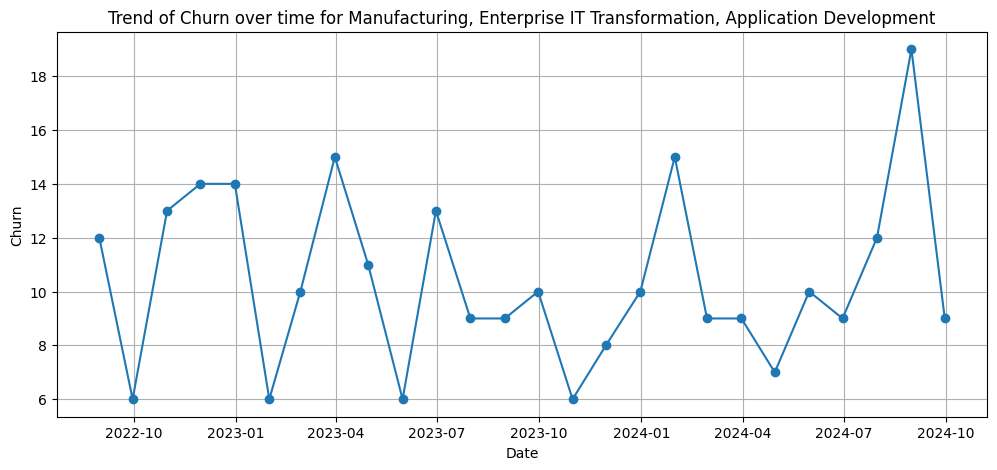

In [11]:
# Plot the trend of churn over time for a specific combination of line of business, delivery unit, and practice unit
lob = 'Manufacturing'
du = 'Enterprise IT Transformation'
pu = 'Application Development'

specific_data = filteredDataset[(filteredDataset['LINE_OF_BUSINESS'] == lob) & 
                                (filteredDataset['DELIVERY_UNIT'] == du) & 
                                (filteredDataset['PRACTICE_UNIT'] == pu)]

specific_data['JOB_ENDDATE'] = pd.to_datetime(specific_data['JOB_ENDDATE'])
monthly_data = specific_data.resample('M', on='JOB_ENDDATE').sum()

plt.figure(figsize=(12, 5))
plt.plot(monthly_data.index, monthly_data['CHURN'], marker='o', linestyle='-')
plt.title(f'Trend of Churn over time for {lob}, {du}, {pu}')
plt.xlabel('Date')
plt.ylabel('Churn')
plt.grid(True)
plt.show()


In [13]:
monthly_data

,LINE_OF_BUSINESS,DELIVERY_UNIT,PRACTICE_UNIT,CHURN
JOB_ENDDATE,,,,
2022-08-31,ManufacturingManufacturingManufacturingManufac...,Enterprise IT TransformationEnterprise IT Tran...,Application DevelopmentApplication Development...,12
2022-09-30,ManufacturingManufacturingManufacturingManufac...,Enterprise IT TransformationEnterprise IT Tran...,Application DevelopmentApplication Development...,6
2022-10-31,ManufacturingManufacturingManufacturingManufac...,Enterprise IT TransformationEnterprise IT Tran...,Application DevelopmentApplication Development...,13
2022-11-30,ManufacturingManufacturingManufacturingManufac...,Enterprise IT TransformationEnterprise IT Tran...,Application DevelopmentApplication Development...,14
2022-12-31,ManufacturingManufacturingManufacturingManufac...,Enterprise IT TransformationEnterprise IT Tran...,Application DevelopmentApplication Development...,14
2023-01-31,ManufacturingManufacturingManufacturingManufac...,Enterprise IT TransformationEnterprise IT Tran...,Application DevelopmentApplication Development...,6
2023-02-28,ManufacturingManufacturingManufacturingManufac...,Enterprise IT TransformationEnterprise IT Tran...,Application DevelopmentApplication Development...,10
2023-03-31,ManufacturingManufacturingManufacturingManufac...,Enterprise IT TransformationEnterprise IT Tran...,Application DevelopmentApplication Development...,15
2023-04-30,ManufacturingManufacturingManufacturingManufac...,Enterprise IT TransformationEnterprise IT Tran...,Application DevelopmentApplication Development...,11


In [14]:
# Group the data by LINE_OF_BUSINESS, DELIVERY_UNIT, PRACTICE_UNIT, and JOB_ENDDATE, then sum the CHURN
grouped_data = filteredDataset.groupby(['LINE_OF_BUSINESS', 'DELIVERY_UNIT', 'PRACTICE_UNIT', pd.Grouper(key='JOB_ENDDATE', freq='M')]).sum().reset_index()

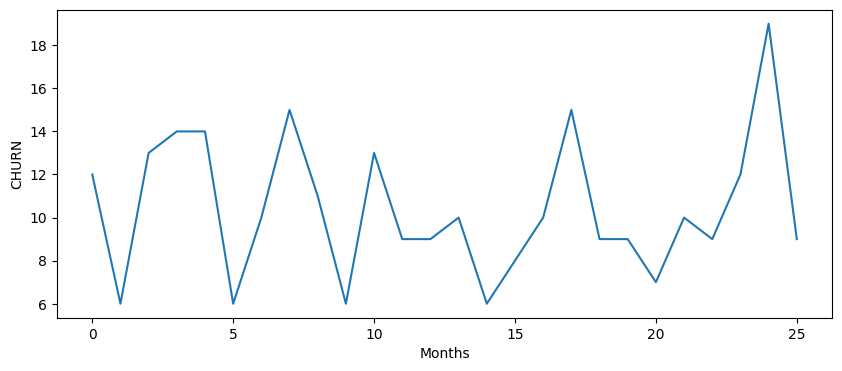

In [15]:
import matplotlib.pyplot as plt
 
# Filter the data for the specific combination
lob = 'Manufacturing'
du = 'Enterprise IT Transformation'
pu = 'Application Development'
 
data = grouped_data[(grouped_data['LINE_OF_BUSINESS'] == lob) &
                    (grouped_data['DELIVERY_UNIT'] == du) &
                    (grouped_data['PRACTICE_UNIT'] == pu)]
 
# Prepare the final dataset
final_dataset = data[['JOB_ENDDATE', 'CHURN']].copy()
 
# Reset the index and create a sequential month number
final_dataset = final_dataset.reset_index(drop=True)
final_dataset['Month'] = final_dataset.index+1
 
# Plot the CHURN over time
plt.figure(figsize=(10, 4))
plt.xlabel("Months")
plt.ylabel("CHURN")
#plt.plot(final_dataset['Month'], final_dataset['CHURN'])
#plt.xticks(ticks=range(1, len(final_dataset['Month']) + 1, 5))  # Adjust tick intervals if necessary
#plt.show()
plt.plot(final_dataset['CHURN'])

In [16]:
final_dataset['mavg_12']= final_dataset['CHURN'].rolling(window = 1).mean().shift(1)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
final_dataset[['CHURN', 'mavg_12']][1:]

,CHURN,mavg_12
1,6,12.00
2,13,6.00
3,14,13.00
4,14,14.00
5,6,14.00
6,10,6.00
7,15,10.00
8,11,15.00
9,6,11.00
10,13,6.00


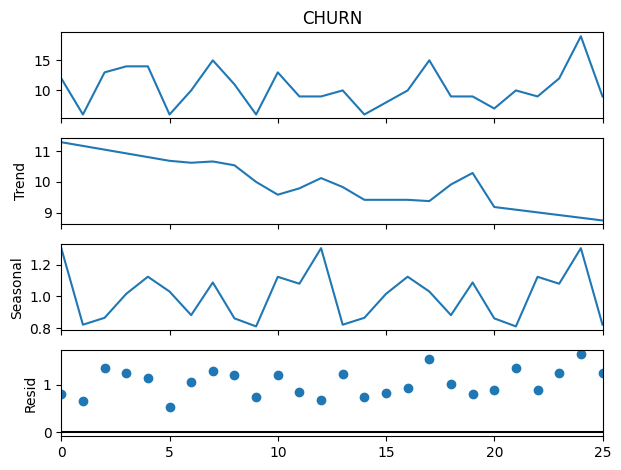

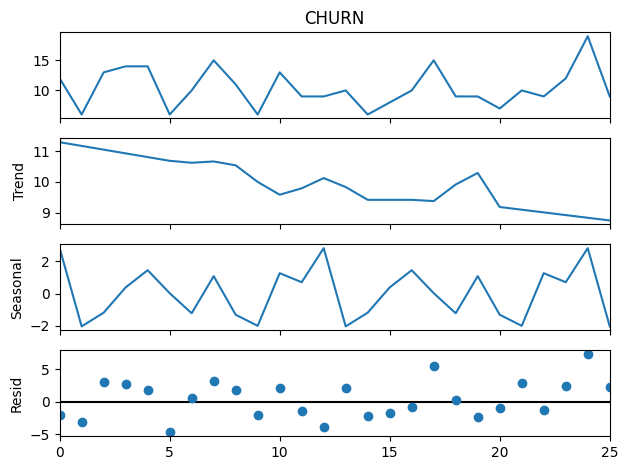

In [17]:
#Decomposing Time series

from statsmodels.tsa.seasonal import seasonal_decompose
ts_decompose_multiplicative = seasonal_decompose(final_dataset['CHURN'], model = 'multiplicative', period=12, extrapolate_trend = 'freq')
ts_decompose_additive = seasonal_decompose(final_dataset['CHURN'], model = 'additive', period=12, extrapolate_trend = 'freq')
#Plotting 
#ts_decompose.show()
ts_plot = ts_decompose_multiplicative.plot()
ts_plot = ts_decompose_additive.plot()

In [18]:
import warnings
warnings.filterwarnings("ignore")
df_decomposed = pd.concat([ts_decompose_multiplicative.seasonal, ts_decompose_multiplicative.trend, ts_decompose_multiplicative.resid, ts_decompose_multiplicative.observed], axis = 1)
df_decomposed.columns = ['seasonal', 'trend', 'residual', 'actual_values']
final_dataset.loc[:,'seasonal'] = df_decomposed.loc[:,'seasonal']
final_dataset.loc[:,'trend'] = df_decomposed.loc[:,'trend']
final_dataset.loc[:,'residual'] = df_decomposed.loc[:,'residual']

In [19]:
import warnings
warnings.filterwarnings("ignore")
final_dataset.loc[:,'MAvg_12']= final_dataset.loc[:,'CHURN'].rolling(window = 12).mean().shift(1)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
final_dataset[['CHURN', 'MAvg_12']][12:]

,CHURN,MAvg_12
12,9,10.75
13,10,10.50
14,6,10.83
15,8,10.25
16,10,9.75
17,15,9.42
18,9,10.17
19,9,10.08
20,7,9.58
21,10,9.25


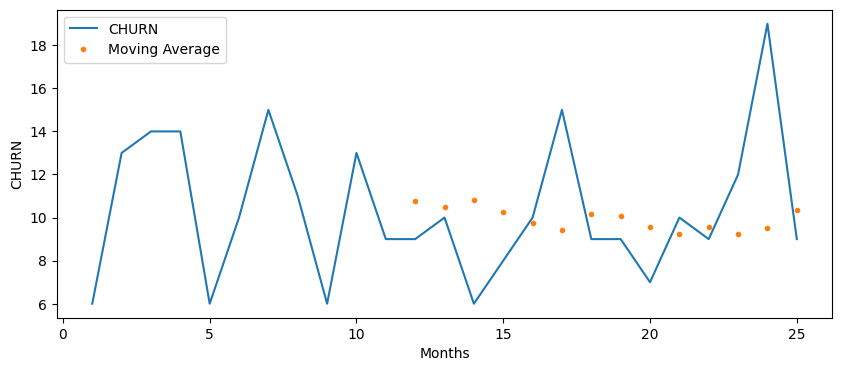

In [20]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("CHURN")
plt.plot(final_dataset['CHURN'][1:])
plt.plot(final_dataset['MAvg_12'][1:], '.')
plt.legend(['CHURN','Moving Average'])

In [21]:
# Defining Mape Function
import numpy as np
def get_mape(actual, predicted):
    y_true , y_pred = np.array(actual) , np.array(predicted)
    return np.round(np.mean(np.abs((y_true-y_pred)/y_true))*100, 2)

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mae_mavg = mean_absolute_error(final_dataset['CHURN'][12:].values , final_dataset['MAvg_12'][12:].values)
mse_mavg = mean_squared_error(final_dataset['CHURN'][12:].values , final_dataset['MAvg_12'][12:].values)
mape_mavg = get_mape(final_dataset['CHURN'][12:].values , final_dataset['MAvg_12'][12:].values)
rmse_mavg = np.sqrt(mse_mavg)
print('Mape error in moving average is', mape_mavg , '%.')
print('Mean Absoulte Error in moving average is', mae_mavg )
print('Mean Squared Error in moving average is', mse_mavg )
print('Root Mean Squared Error in moving average is', rmse_mavg )

Mape error in moving average is 24.03 %.
Mean Absoulte Error in moving average is 2.4940476190476195
Mean Squared Error in moving average is 12.333829365079366
Root Mean Squared Error in moving average is 3.511955205448863


In [23]:
#Exponential Smoothing
final_dataset.loc[:,'EWM'] = final_dataset.loc[:,'CHURN'].ewm(alpha = 0.2).mean()
final_dataset[12:]

,JOB_ENDDATE,CHURN,Month,mavg_12,seasonal,trend,residual,MAvg_12,EWM
12,2023-08-31,9,13,9.00,1.30,10.12,0.68,10.75,10.13
13,2023-09-30,10,14,9.00,0.82,9.83,1.24,10.50,10.10
14,2023-10-31,6,15,10.00,0.86,9.42,0.74,10.83,9.25
15,2023-11-30,8,16,6.00,1.02,9.42,0.84,10.25,8.99
16,2023-12-31,10,17,8.00,1.12,9.42,0.95,9.75,9.20
17,2024-01-31,15,18,10.00,1.03,9.38,1.55,9.42,10.38
18,2024-02-29,9,19,15.00,0.88,9.92,1.03,10.17,10.10
19,2024-03-31,9,20,9.00,1.09,10.29,0.80,10.08,9.88
20,2024-04-30,7,21,9.00,0.86,9.18,0.89,9.58,9.30
21,2024-05-31,10,22,7.00,0.81,9.09,1.36,9.25,9.44


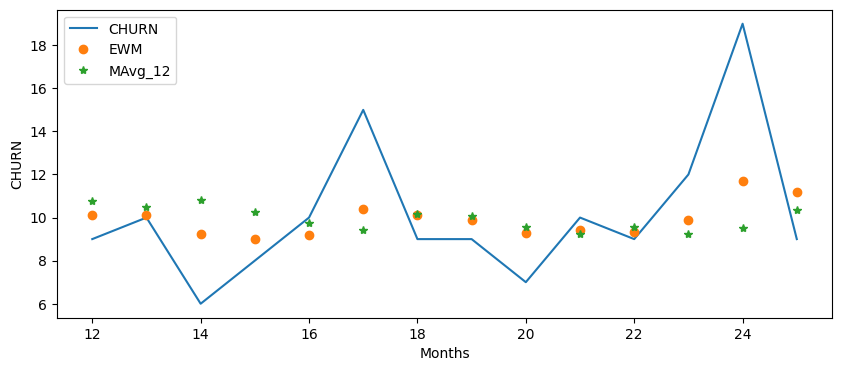

In [24]:
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("CHURN")
plt.plot(final_dataset['CHURN'][12:])
plt.plot(final_dataset['EWM'][12:], 'o')
plt.plot(final_dataset['MAvg_12'][12:], '*')
plt.legend(['CHURN','EWM','MAvg_12'])

In [25]:
mae_ewm = mean_absolute_error(final_dataset['CHURN'][12:].values , final_dataset['EWM'][12:].values)
mse_ewm = mean_squared_error(final_dataset['CHURN'][12:].values , final_dataset['EWM'][12:].values)
mape_ewm = get_mape(final_dataset['CHURN'][12:].values , final_dataset['EWM'][12:].values)
rmse_ewm = np.sqrt(mse_ewm)
print('Mape = ', mape_ewm , '%.')
print('MAE = ', mae_ewm )
print('MSE = ', mse_ewm )
print('RMSE = ', rmse_ewm )

print('Error reduced by', (mape_mavg-mape_ewm)*100/mape_mavg , '%')

Mape =  18.81 %.
MAE =  1.9752797550082621
MSE =  7.485505310446427
RMSE =  2.735965151540938
Error reduced by 21.722846441947574 %


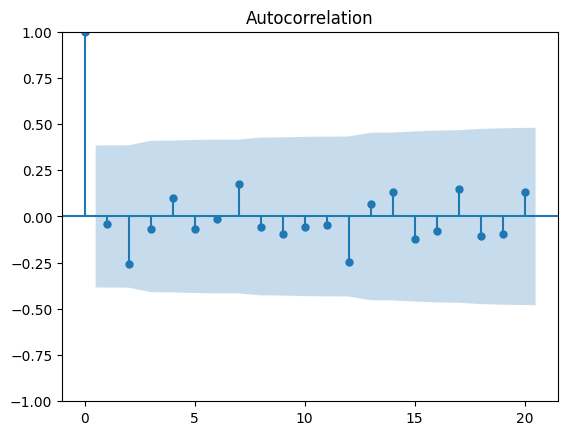

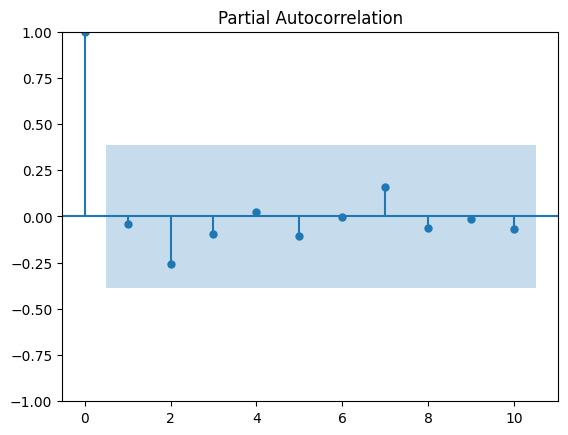

In [26]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

acf_plot = plot_acf(final_dataset.CHURN, lags =20)
pacf_plot = plot_pacf(final_dataset.CHURN , lags =10)

In [27]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
arima_model_1 = ARIMA(final_dataset['CHURN'][0:12], order=(1,0,0)) #first 1 AR-autoregression (p), Last 0 Moving Avg (q), Middle (d) 0 - Integration 1,1,1 Integratiive auto regression moving average
ar_model_1 = arima_model_1.fit()
ar_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  CHURN   No. Observations:                   12
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -30.632
Date:                Sun, 06 Oct 2024   AIC                             67.263
Time:                        07:24:37   BIC                             68.718
Sample:                             0   HQIC                            66.725
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7575      0.878     12.249      0.000       9.036      12.479
ar.L1         -0.2236      0.447     -0.501      0.617      -1.099       0.652
sigma2         9.6129      6.828      1.408      0.159      -3.771      22.996
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.60   Prob(JB):                         0.63
Heteroskedasticity (H):               0.72   Skew:                            -0.24
Prob(H) (two-sided):                  0.76   Kurtosis:                         1.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
forecast_ar_1 = ar_model_1.predict(12,18)
mape_ar_1 = get_mape(final_dataset['CHURN'][12:19], forecast_ar_1)
mae_ar_1 = mean_absolute_error(final_dataset['CHURN'][12:19].values , forecast_ar_1)
mse_ar_1 = mean_squared_error(final_dataset['CHURN'][12:19].values , forecast_ar_1)
mape_ar_1 = get_mape(final_dataset['CHURN'][12:19].values , forecast_ar_1)
rmse_ar_1 = np.sqrt(mse_ar_1)
print('Mape error in Auto Regressive model with lag = 1  is', mape_ar_1 , '%.')
print('MAE = ', mae_ar_1 )
print('MSE = ', mse_ar_1 )
print('RMSE = ', rmse_ar_1 )

Mape error in Auto Regressive model with lag = 1  is 28.57 %.
MAE =  2.444169044203477
MSE =  8.162712330884714
RMSE =  2.8570460848373997


In [29]:
# Standard ARIMA Model
import pmdarima as pm
ARIMA_model = pm.auto_arima(final_dataset['CHURN'], 
                            start_p=1, 
                            start_q=1,
                            test='adf', 
                            max_p=3, max_q=3, 
                            m=1, 
                            d=None,
                            seasonal=False, 
                            trace=False, 
                            error_action='warn', 
                            suppress_warnings=True,
                            stepwise=True)

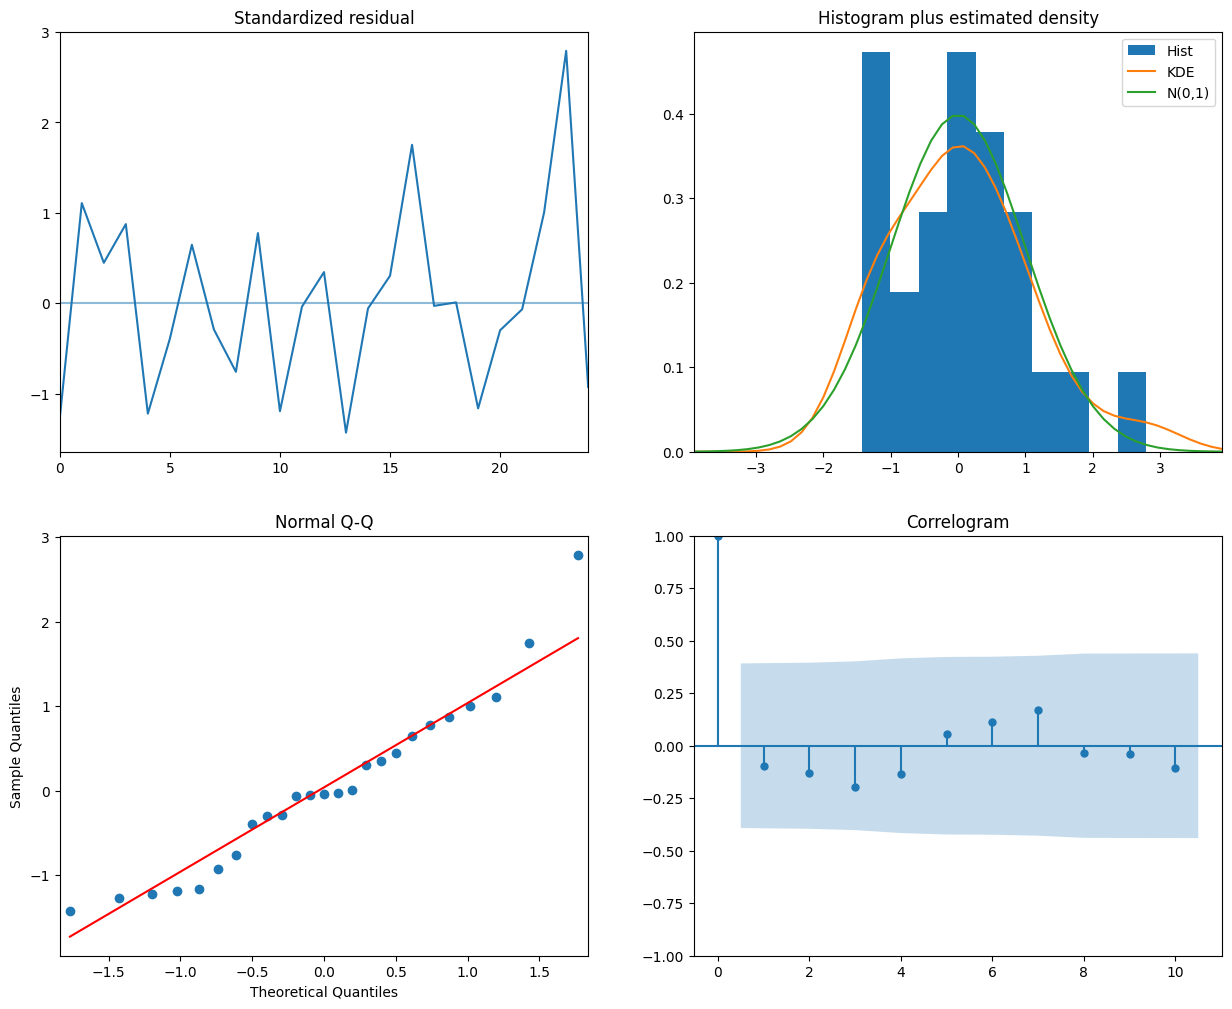

In [30]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

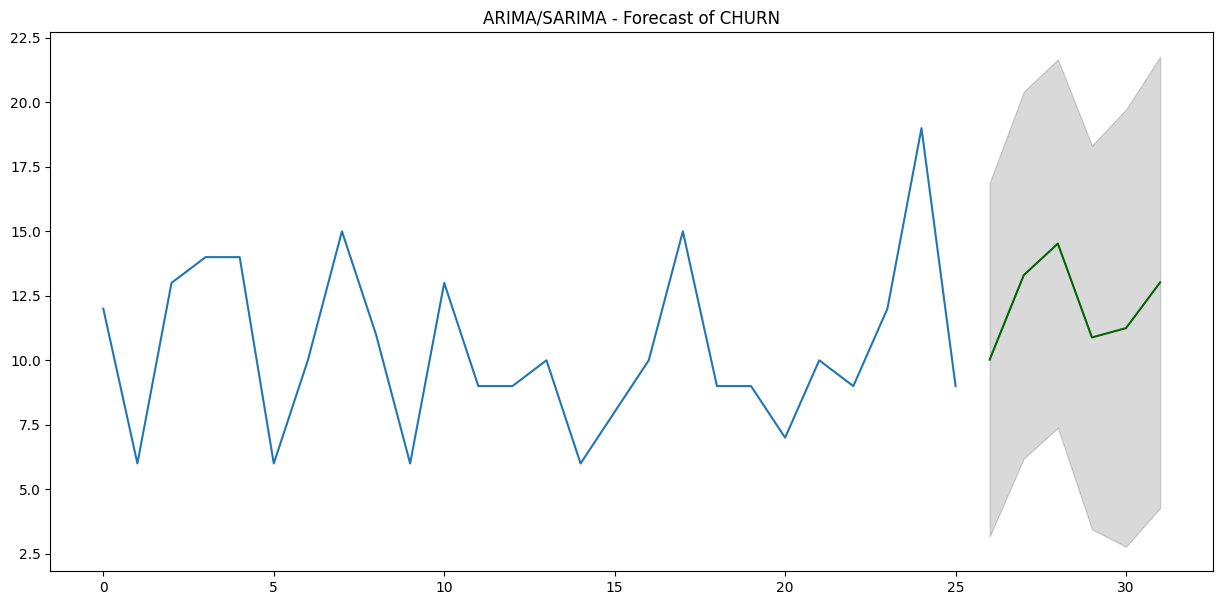

In [31]:
def forecast(ARIMA_model, periods):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.Series(range(final_dataset.index[-1]+1 , final_dataset.index[-1]+1 + periods))

 # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(final_dataset['CHURN'], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of CHURN")
    plt.show()

forecast(ARIMA_model,6)

In [32]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(final_dataset['CHURN'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=0, 
                         D = 1, #order of the seasonal differencing
                         trace=False,
                         error_action='warn',  
                         suppress_warnings=False, 
                         stepwise=True)

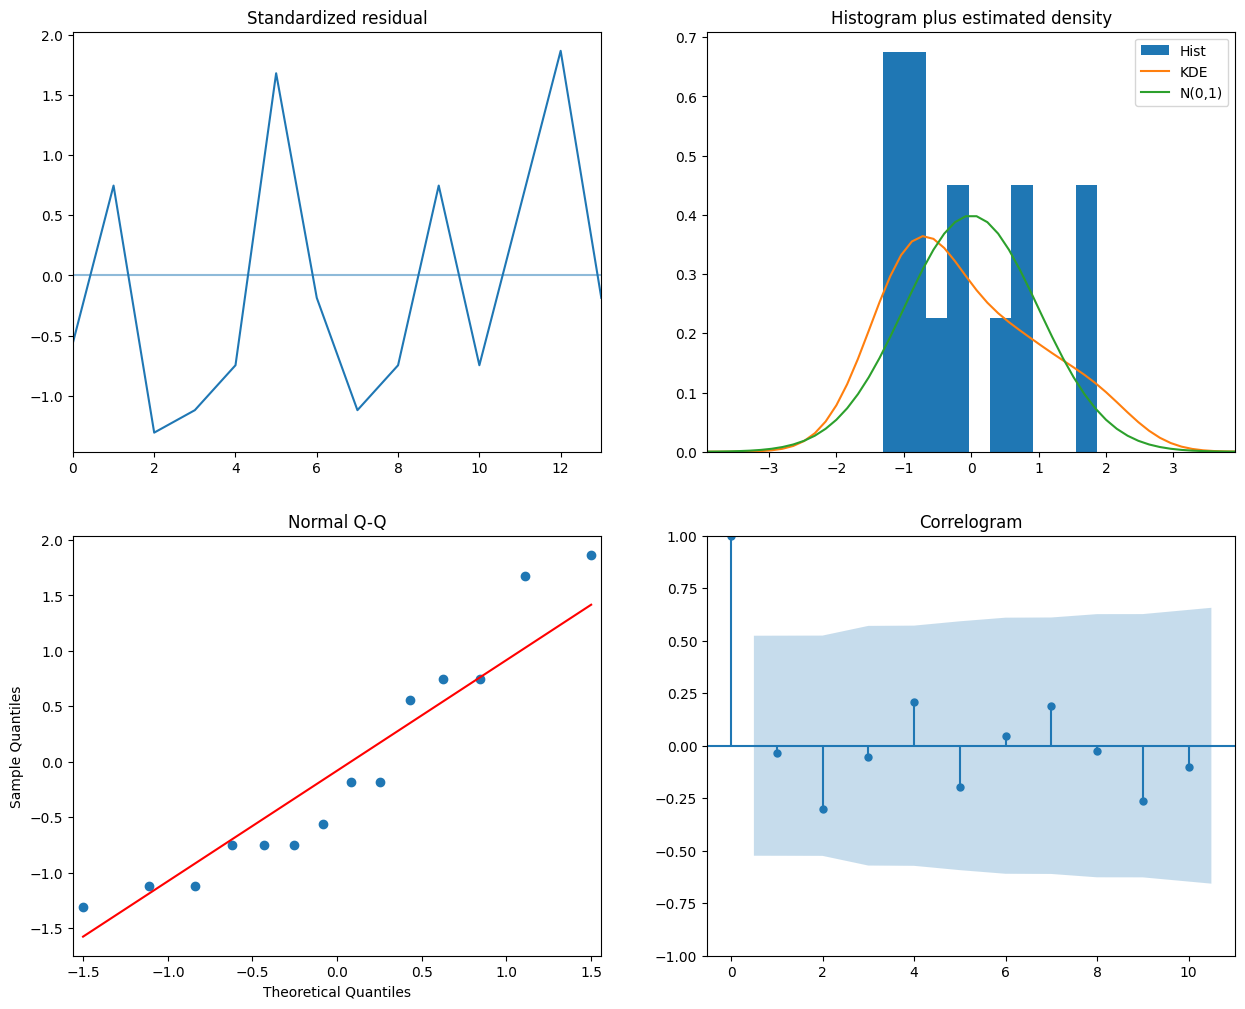

In [33]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

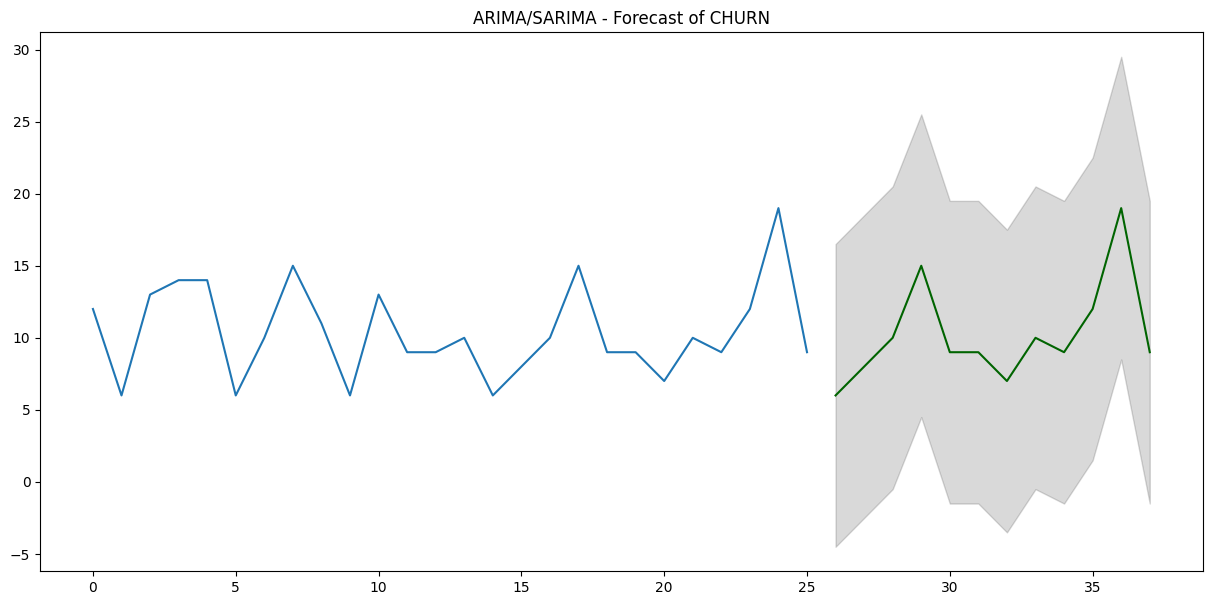

In [34]:
forecast(SARIMA_model,12)

In [35]:
#adding exogenous variable
#final_dataset['month_index'] = final_dataset.index.month

# SARIMAX Model
SARIMAX_model = pm.auto_arima(final_dataset[['CHURN']], exogenous=final_dataset[['Month']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=0, D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
get_parametes = SARIMAX_model.get_params()
print(type(get_parametes))
get_parametes

<class 'dict'>


{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 0, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 1, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

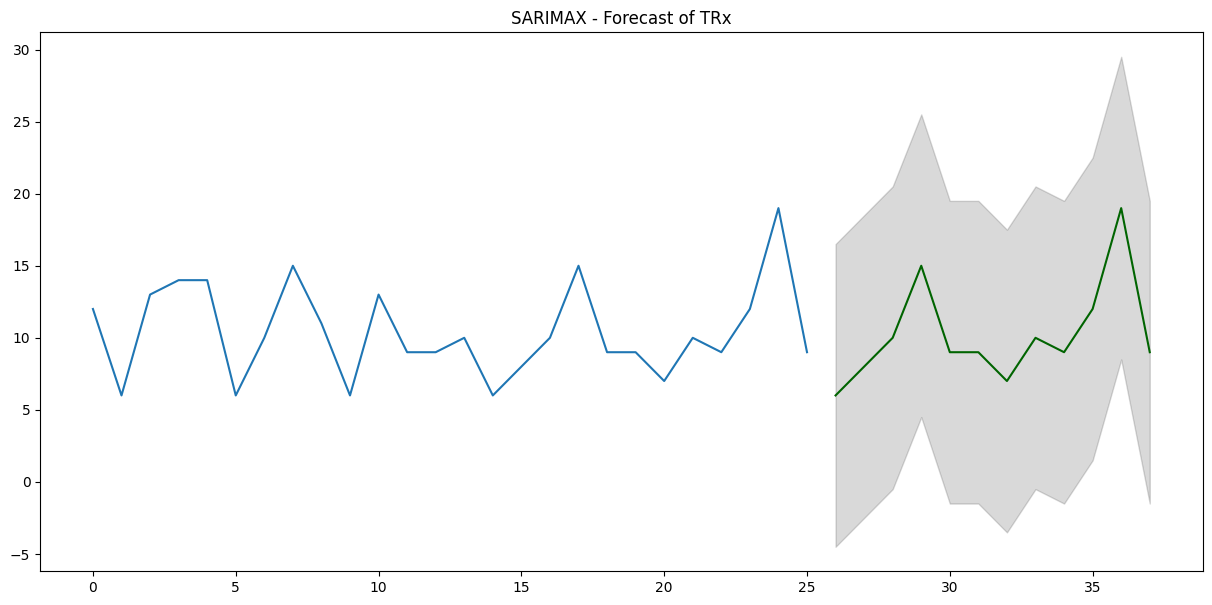

In [36]:
def sarimax_forecast(SARIMAX_model, periods):
    # Forecast
    n_periods = periods

    forecast_df = pd.DataFrame({"month_index":pd.date_range(final_dataset.index[-1], periods = n_periods, freq='MS').month},
                    index = pd.Series(range(final_dataset.index[-1]+1 , final_dataset.index[-1]+1 + periods)))
    fitted, confint = SARIMAX_model.predict(n_periods=n_periods, 
                                            return_conf_int=True,
                                            exogenous=forecast_df[['month_index']])
    index_of_fc = pd.Series(range(final_dataset.index[-1]+1 , final_dataset.index[-1]+1 + periods))

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    
    #print(fitted_series)
    #print(lower_series)
    #print(upper_series)
    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(final_dataset['CHURN'], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of TRx")
    plt.show()
    
sarimax_forecast(SARIMAX_model, 12)

In [37]:
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm

warnings.filterwarnings("ignore")

# Get unique combinations of LINE_OF_BUSINESS, DELIVERY_UNIT, and PRACTICE_UNIT
unique_combinations = grouped_data[['LINE_OF_BUSINESS', 'DELIVERY_UNIT', 'PRACTICE_UNIT']].drop_duplicates()

forecasted_values = []
n_periods = 25

for _, row in unique_combinations.iterrows():
    lob = row['LINE_OF_BUSINESS']
    du = row['DELIVERY_UNIT']
    pu = row['PRACTICE_UNIT']
    
    data = grouped_data[(grouped_data['LINE_OF_BUSINESS'] == lob) & 
                        (grouped_data['DELIVERY_UNIT'] == du) & 
                        (grouped_data['PRACTICE_UNIT'] == pu)]
    
    org_wise_data = data[['CHURN']].reset_index(drop=True)
    org_wise_data['Month'] = org_wise_data.index + 1

    SARIMAX_model = pm.auto_arima(org_wise_data[['CHURN']], exogenous=org_wise_data[['Month']],
                                  start_p=1, start_q=1, test='adf', max_p=3, max_q=3, m=12,
                                  start_P=0, seasonal=True, d=0, D=1, 
                                  trace=False, error_action='ignore', 
                                  suppress_warnings=True, stepwise=True)

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.Series(range(org_wise_data.index[-1], org_wise_data.index[-1] + n_periods))

    # Make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Use additive model for seasonal decomposition
    ts_decompose_additive = seasonal_decompose(fitted, model='additive', period=12, extrapolate_trend='freq')
    
    forecasted_values.append([fitted, lob, du, pu])


In [38]:

# Initialize the DataFrame
forecasted_data = pd.DataFrame(columns=['LINE_OF_BUSINESS', 'DELIVERY_UNIT', 'PRACTICE_UNIT', 'MONTH', 'FORECASTED_ATTRITION'])
 
# Populate the DataFrame with forecasted values
for j in range(len(forecasted_values)):
    for i in range(len(forecasted_values[j])):
        forecasted_data.loc[len(forecasted_data.index)] = [
            forecasted_values[j][1],                  # LINE_OF_BUSINESS
            list(forecasted_values[j][2])[i],         # DELIVERY_UNIT
            list(forecasted_values[j][3])[i],         # PRACTICE_UNIT
            25 + i,                                   # MONTH
            round(list(forecasted_values[j][0])[i])  # FORECASTED_ATTRITION
        ]
 
# Display the first few rows of the DataFrame
print(forecasted_data.head())

                 LINE_OF_BUSINESS DELIVERY_UNIT PRACTICE_UNIT  MONTH   
0  Banking and Financial Services             C             C     25  \
1  Banking and Financial Services             y             o     26   
2  Banking and Financial Services             b             m     27   
3  Banking and Financial Services             e             p     28   
4  Banking and Financial Services             C             R     25   

   FORECASTED_ATTRITION  
0                    13  
1                    12  
2                     8  
3                    14  
4                     8  


In [39]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
start_date = datetime(2024,10,31)
forecasted_data.loc[:,'DATE'] = forecasted_data.loc[:,'MONTH'].apply(lambda x: start_date + relativedelta(months = x-24))

In [40]:
forecasted_data

,LINE_OF_BUSINESS,DELIVERY_UNIT,PRACTICE_UNIT,MONTH,FORECASTED_ATTRITION,DATE
0,Banking and Financial Services,C,C,25,13,2024-11-30
1,Banking and Financial Services,y,o,26,12,2024-12-31
2,Banking and Financial Services,b,m,27,8,2025-01-31
3,Banking and Financial Services,e,p,28,14,2025-02-28
4,Banking and Financial Services,C,R,25,8,2024-11-30
...,...,...,...,...,...,...
283,Travel Transportation and Hospitality (TTH),e,,28,4,2025-02-28
284,Travel Transportation and Hospitality (TTH),E,E,25,6,2024-11-30
285,Travel Transportation and Hospitality (TTH),n,n,26,13,2024-12-31
286,Travel Transportation and Hospitality (TTH),t,t,27,11,2025-01-31


In [41]:
# Save the DataFrame to a CSV file
forecasted_data.to_csv('forecasted_data.csv', index=False)

print("Forecasted data has been saved to 'forecasted_data.csv'")

Forecasted data has been saved to 'forecasted_data.csv'
